## Paso 3: Entendimiento de los datos

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargamos datos tras paso 2
tracks = pd.read_csv(r'E:\Documentos\Github\proyecto-analisis-de-datos-1INF03-main\datos\tracks.csv')
# tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')
# tracks = pd.read_csv("../datos/tracks.csv")

In [28]:
print('La base tiene', tracks.shape[0], 'filas y', tracks.shape[1], 'columnas')

La base tiene 586672 filas y 20 columnas


In [29]:
print('Las columnas se la base se llaman:', tracks.columns.to_list())

Las columnas se la base se llaman: ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [30]:
tracks.dtypes
print('Se tiene los siguientes tipos de datos por columna: \n',tracks.dtypes)

Se tiene los siguientes tipos de datos por columna: 
 id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


In [31]:
# Descripción de los datos
tracks.info()

type(tracks.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

pandas.core.indexes.base.Index

In [32]:
# Convertimos la variable 'release_date', de object a datetime64[ns]
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format = "%Y-%m-%d")

Eliminaremos la columna de 'artists' ya que no presenta información relevante para el modelo debido a que se cuenta con la columna id_artists  que guardaría la información de los artistas por lo que se estaría duplicando esta información 

In [33]:
print(tracks.shape)
tracks.drop(["artists"], axis = 1, inplace = True)
print(tracks.shape)

(586672, 20)
(586672, 19)


### Datos duplicados

In [34]:
# Como cada fila de este dataset corresponde a una canción diferente,
# omitimos los duplicados vía el identificador de cada canción
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace = True)
print(tracks.shape)

(586672, 19)
(586672, 19)


Se observa que los datos no tienen filas con valores duplicados, es decir, no existen registros repetidos.

### Datos vacíos

In [35]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
tempo,0,0.0
key,0,0.0


Encontramos que solo la columna "name" almacena valores vacios, en particular, 71.

Como se comentó en el paso dos, es posible que la columna "name" se trate de un identificador.
Asimismo, la información de la columna "id" identifica a las canciones, así que, como
la variable "id" **no presenta valores vacíos**, no es necesario remover las filas
asociadas a valores vacíos de la columna "name".

Más bien, basta descartar a la columna "name", pues su información podemo obtenerla
vía la variable "id".

### Medidas de resumen para variables numericas

In [36]:
# Separación de variables en numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

In [37]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 4)
Variables numéricas (586672, 15)


In [38]:
# Estadisticos desciptivas para las variables numéricas
dfnum.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


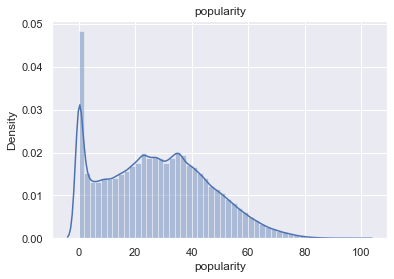

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


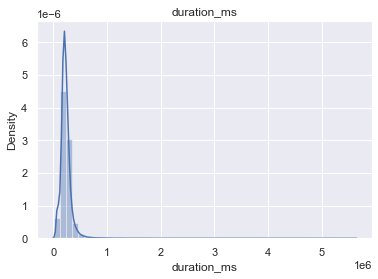

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


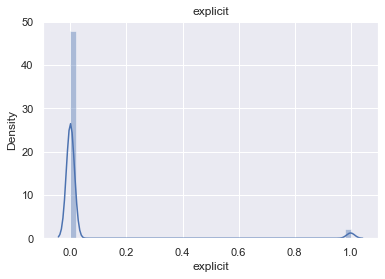

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


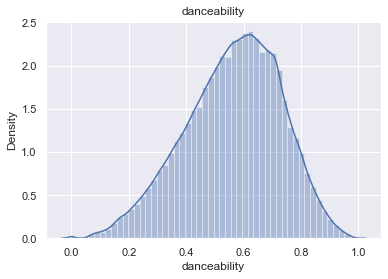

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


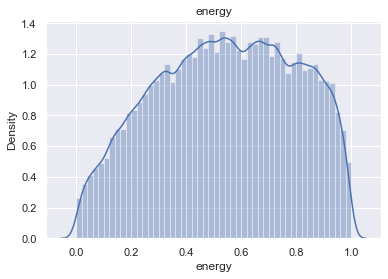

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


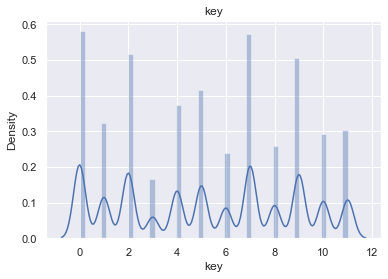

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


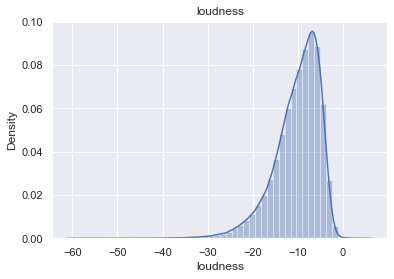

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


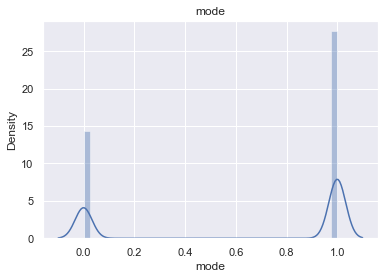

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


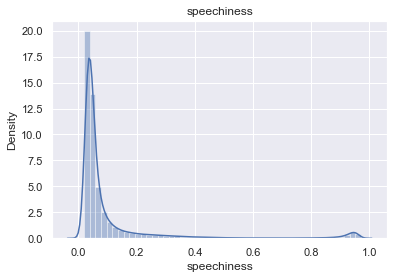

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


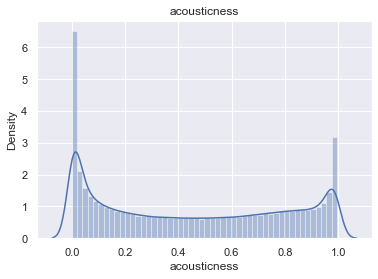

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


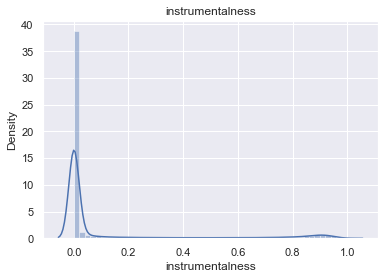

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


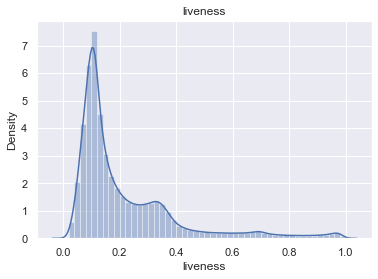

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


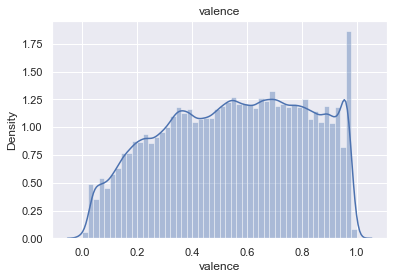

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


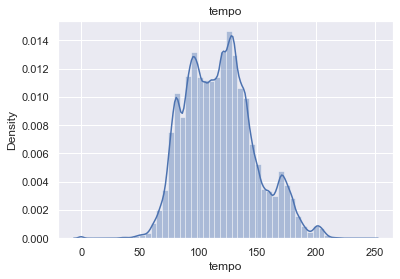

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


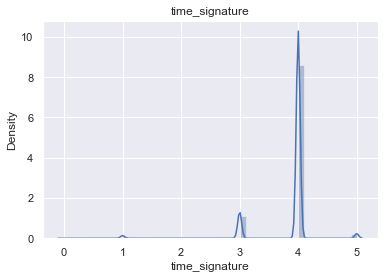

In [39]:
# Distribuciones de los datos numéricos
columnas_numericas = dfnum.columns.tolist()
sns.set(style = "darkgrid")
for col in columnas_numericas:
  sns.distplot(dfnum[col])
  plt.title(col)
  plt.show()

Note entonces que las variables **explicit**, **key**, **mode** y **time_signature** no parecen ser variables numéricas.

En base a la descripción de tales variabes, como se observa en la tabla presentada en el paso 2,
convertiremos aquellas tres variables a strings, por tratarse de valores categóricos.

En particular, la variable **explicit** es un boolean. 

Por ello, volvemos a separar en dos grupos a las variables del dataset en original.

Asimismo, en base a la presencia de colas de gran longitud (respecto al rango de las variables), 
conviene trabajar más bien con el logaritmo de las variables numéricas **duration_ms, speechiness, instrumentalness**.

In [40]:
# Antes de tomar logaritmo, revisemos que es
# matematicamente correcto emplear tal función

print((tracks.duration_ms < 0).sum())
print((tracks.speechiness < 0).sum())
print((tracks.instrumentalness < 0).sum())

print((tracks.duration_ms == 0).sum())
print((tracks.speechiness == 0).sum())
print((tracks.instrumentalness == 0).sum())

0
0
0
0
329
205083


Sabemos que las variables **speechiness** e **instrumentalness**
están en el rango [0; 1], valiendo 0 para algunas observaciones. 

Entonces, añadiremos 0.001 a los valores en tales columnas, para poder emplear logaritmo.

In [41]:
for col in ["duration_ms", "speechiness", "instrumentalness"]:
  tracks[col] = tracks[col] + 0.001
  tracks[col] = np.log10(tracks[col])

In [42]:
# Variable explicit
print(tracks[["explicit"]].value_counts())
# Como tal variable vale 0 o 1, y, según su definición
# es de tipo boolean, no es necesario convertirla a boolean.
# La convertirmos a string para separar la data en variables
# númericas y categóricas.

# Variables string
tracks[["key", "mode", "time_signature", "explicit"]] = tracks[["key", "mode", "time_signature", "explicit"]].astype('string')

# División de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

# Nuevas dimensiones
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

# Guardar data frames previo a imputación
dfnum.to_csv("../datos/dfnum_pre_imp.csv", index = False, sep = ",")
dfcat.to_csv("../datos/dfcat.csv", index = False, sep = ",")

explicit
0           560808
1            25864
dtype: int64
Variables categóricas (586672, 8)
Variables numéricas (586672, 11)


### Medidas de resumen para variables categóricas

In [43]:
# Comparamos las variables, posiblemente idénticas en 
# información, "id" y "name"
for columna in dfcat.columns[0:2]:
  print(dfcat[columna].value_counts())

35iwgR4jXetI318WEWsa1Q    1
6cHlho8Qe04uAIa1hd6efJ    1
1AL2EDY1U2dLL0WqQGtNu0    1
4vsj6KApKrZnQnF76Zve2u    1
5D0srsR8tggP6mLAdBn8d9    1
                         ..
2LQ4m8ippuDqoUp1xBNEhh    1
0AXvsASR6KBRuiVpO5YLYf    1
0Bmbax5v1Vn8HTxbeW1Uaf    1
2Chd3LE68nQnVjPOfreCuN    1
5Ocn6dZ3BJFPWh4ylwFXtn    1
Name: id, Length: 586672, dtype: int64
Summertime                                  101
Intro                                        92
Year 3000                                    91
Hold On                                      87
2000 Years                                   76
                                           ... 
0024 - und die silberne Spinne - Teil 31      1
בוקר של קרנבל                                 1
0024 - und die silberne Spinne - Teil 30      1
Disguise                                      1
A Day At A Time                               1
Name: name, Length: 446474, dtype: int64


Notamos entonces que la variable **name** presenta repeticiones en algunas de sus categorías.

En base a lo explicado , optaremos por descartar, más adelante, la columna **name**, 

porque realizaremos algunas transformaciones para este dato, con fin exploratorio de la data.

In [44]:
dfcat.dtypes

id                        object
name                      object
explicit                  string
id_artists                object
release_date      datetime64[ns]
key                       string
mode                      string
time_signature            string
dtype: object

Como las variables **id** e **id_artists** son Identificadores,
no vale la pena describir sus estadísticos. 

Consideremos entonces solo a las variables categóricas
**release_date**, **key**, **mode** y **time_signature**.

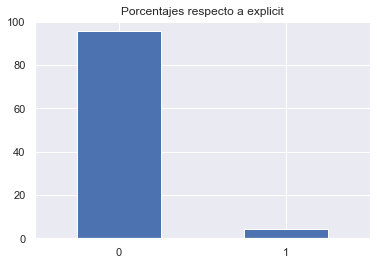

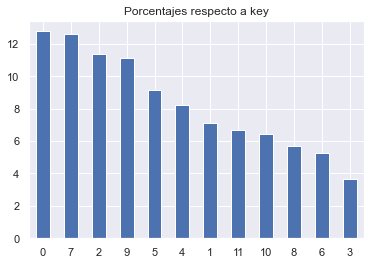

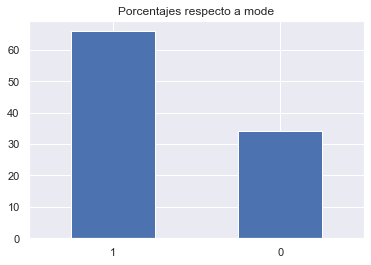

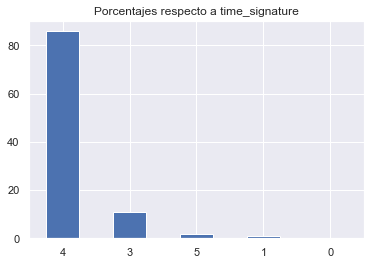

In [45]:
for columna in ["explicit", "key", "mode", "time_signature"]:
  (100 * dfcat[columna].value_counts() / len(dfcat[columna])).plot(
    kind = "bar",
    title = f"Porcentajes respecto a {columna}", 
    rot = 0
  )
  plt.show()

### **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

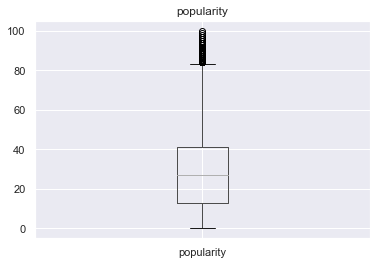

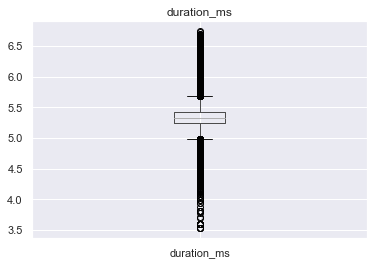

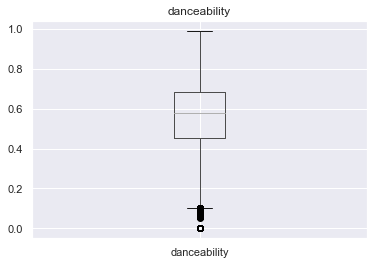

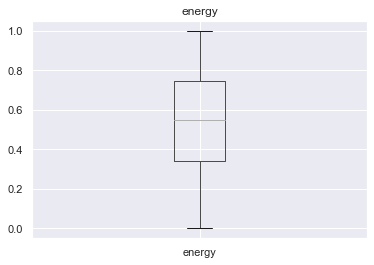

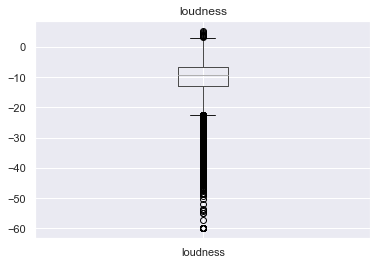

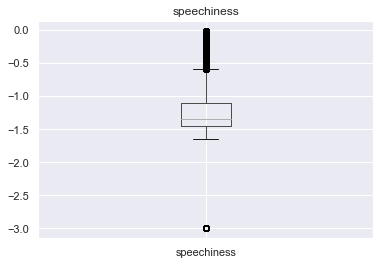

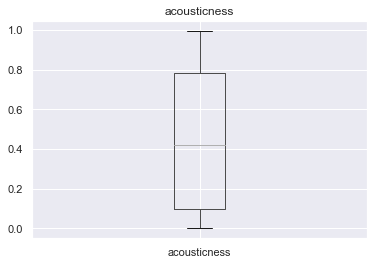

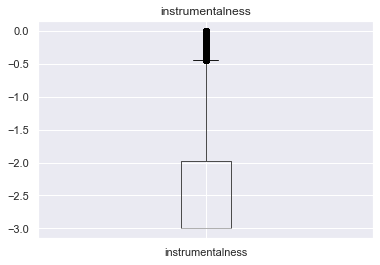

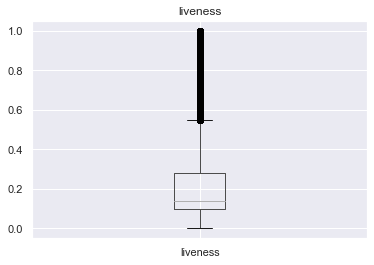

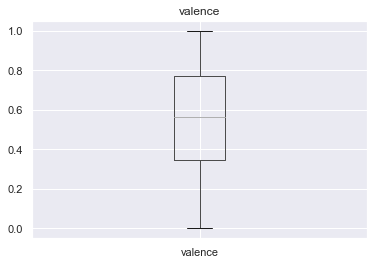

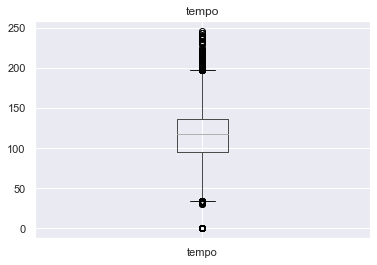

In [46]:
# Graficamos los boxplots de las variables numéricas
columnas = dfnum.columns.to_list()

for columna in columnas:
  dfnum.boxplot(column = columna)
  plt.title(columna)
  plt.show()

Respecto a la manera estándar pata calcular valores atípicos, se observa que casi todas las
filas numéricas presentarían outliers. Sin embargo, aquel criterio estándar es de utilidad
cuando la variable analizada posee una distribución aproximadamente gaussiana.

Por ello, generemos **Q-Q plots** para darnos una idea de qué tan gaussianas
son las distribuciones de nuestras variables numéricas.

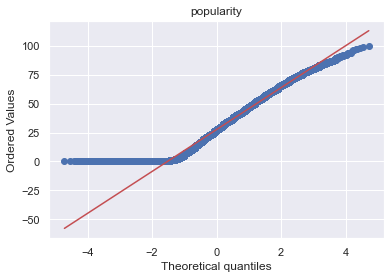

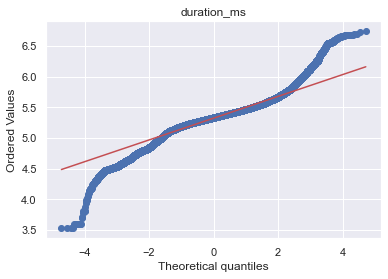

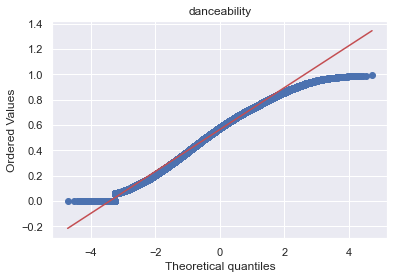

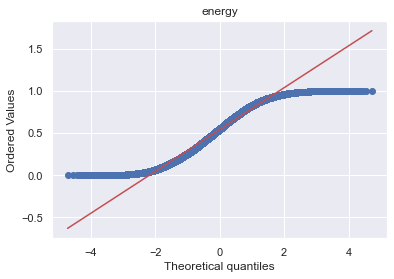

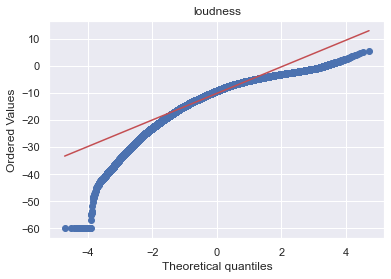

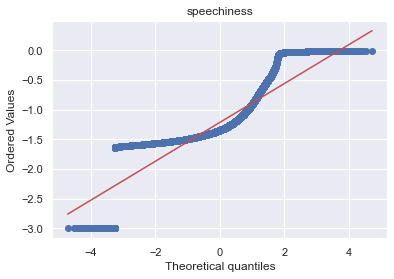

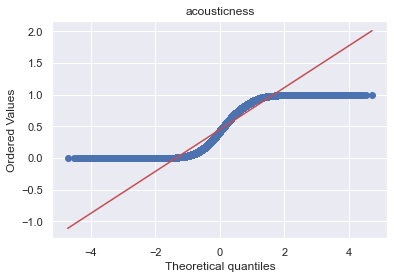

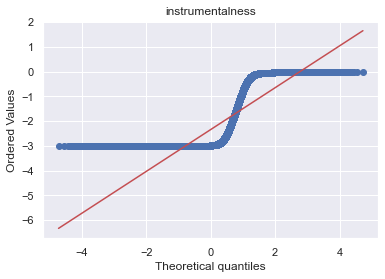

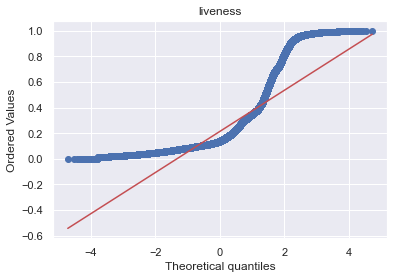

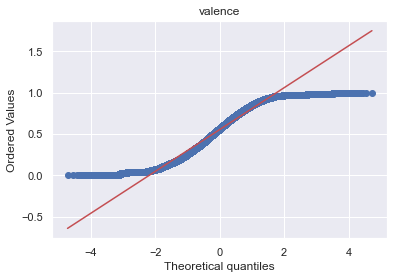

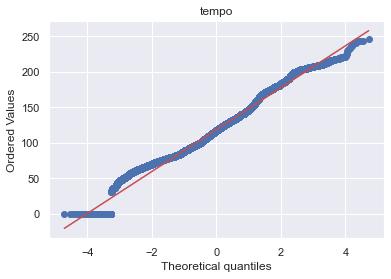

In [47]:
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum.select_dtypes('number').columns:
  stats.probplot(dfnum[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()

Se observa que las variables no siguen una distribución gaussiana.

Por ello, en este contexto, el tratamiento de outliers debería ser revisando variable por variable.

#### Datos numéricos

El tratamiento de los whiskers para las variables numéricos lo realizamos de manera interactiva, vía la aplicación creada por el documento **custom-whiskers.qmd** presente en esta misma carpeta.

A continuación, graficaremos los resultados obtenidos vía tal aplicación, habiendo analizado caso por caso las variables en **dfnum**, con el fin de determinar
whiskers apropiados que nos permitan identificar valores atipicos.

Tales valores atípicos los definimos de manera que realmente se alejen de la mediana o media de la variable analizada, y que el porcentaje de valores
atípicos obtenido no supere el 10% del total de datos, debido a que sino más adelante imputaríamos
un porcentaje significativo de la data de cada variable numérica, creando así mucha información
ficticia para los modelos predictivos a emplearse.

variable | whisker inferior | whisker superior | % por imputar
:---: | :---: | :---: | :---:
duration_ms | 4.7 | 5.9 | 1.13
danceability | 0.04 | 0.99 | 0.06
energy | 0 | 1 | 0.01
loudness | -30 | 0 | 0.44
speechiness | -1.65 | -0.185 | 3.93
acousticness | 0 | 1 | 0.01
instrumentalness | -3.15 | -0.05 | 4.1
liveness | 0 | 0.7 | 3.89
valence | 0 | 1 | 0.06
tempo | 50 | 210 | 0.26

Aclaramos que el **porcentaje por imputar** presente en la tabla previa es en realidad una aproximación (muy buena, pero no exacta) del verdadero porcentaje por imputar. 

Por ejemplo, como los valores de **energy** están, por definición, entre 0 y 1, en realidad en tal caso no se realizará imputación.

Sin embargo, hemos tenido esa situación en cuenta para los códigos siguientes a emplear.

In [48]:
# variable: [whisker_inferior, whisker_superior, %_a_imputar]
custom_whiskers = {
  "duration_ms": [4.7, 5.9, 1.13],
  "danceability": [0.04, 0.99, 0.06],
  "energy": [0, 1, 0.01],
  "loudness": [-30, 0, 0.44],
  "speechiness": [-1.65, -0.185, 3.93],
  "acousticness": [0, 1, 0.01],
  "instrumentalness": [-3.15, -0.05, 4.1],
  "liveness": [0, 0.7, 3.89],
  "valence": [0, 1, 0.06],
  "tempo": [50, 210, 0.26],
}

In [49]:
# Gráfico de las distribuciones, con los 
# whiskers (en amarillos) obtenidos
def grafica_custom_whiskers(columna):
  sns.distplot(dfnum[columna])
  # Rectas verticales para la media y mediana
  plt.axvline(dfnum[columna].mean(), color = "red", linestyle = "--")
  plt.axvline(dfnum[columna].median(), color = "green", linestyle = "--")
  
  # Cuartiles usuales
  plt.axvline(dfnum[columna].quantile(0.25), color = "black", linestyle = "--")
  plt.axvline(dfnum[columna].quantile(0.75), color = "black", linestyle = "--") 
  
  # Whiskers escogidos
  whisker_superior = custom_whiskers[columna][0]
  whisker_inferior = custom_whiskers[columna][1]
  porcentaje_por_imputar = custom_whiskers[columna][2]
  
  plt.axvline(whisker_superior, color = "yellow", linestyle = "--") 
  plt.axvline(whisker_inferior, color = "yellow", linestyle = "--") 
  plt.title(f"Proporción aproximada por imputar: {porcentaje_por_imputar}%")
  plt.show()

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


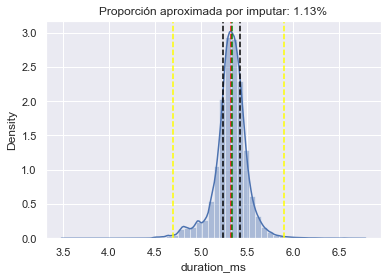

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


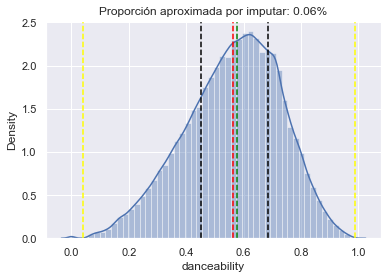

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


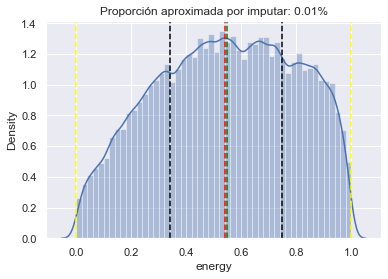

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


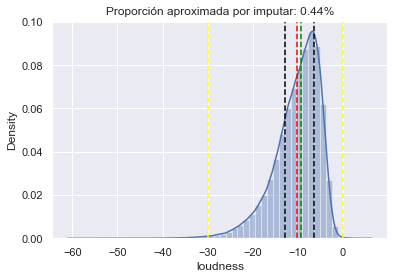

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


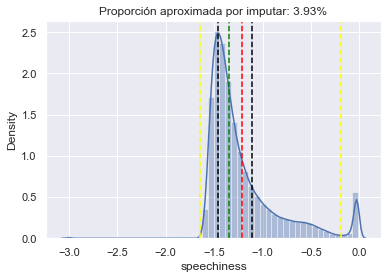

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


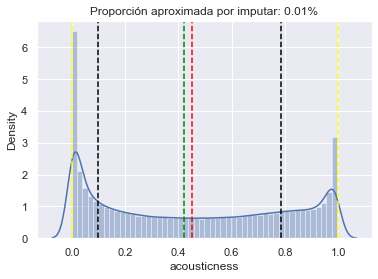

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


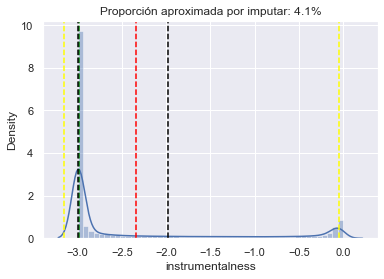

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


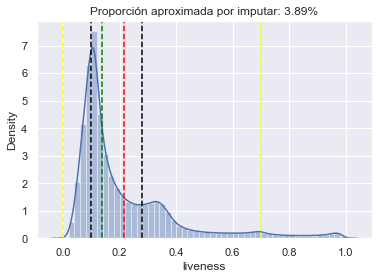

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


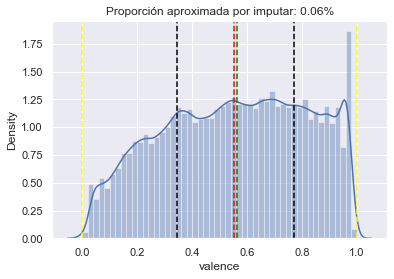

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


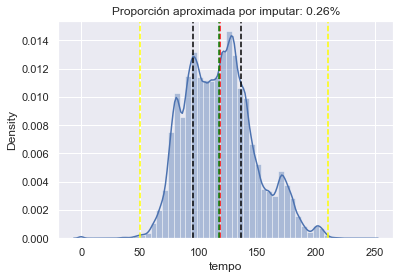

In [50]:
for columna in list(custom_whiskers.keys()):
  grafica_custom_whiskers(columna)

In [51]:
# Obtener índices de los valores atípicos
def indices_outliers(columna):
  outliersInf = (dfnum[columna] < custom_whiskers[columna][0])
  outliersInf = outliersInf[outliersInf == True].index.to_list()

  outliersSup = (dfnum[columna] > custom_whiskers[columna][1])   
  outliersSup = outliersSup[outliersSup == True].index.to_list()
  
  return (outliersSup + outliersInf)

In [52]:
# Obtener los índices de los outliers en dfnum
dfnum_sin_outliers = dfnum.copy()
for columna in list(custom_whiskers.keys()):
  dfnum_sin_outliers.loc[indices_outliers(columna), columna] = np.nan

In [53]:
# Revisamos la conversión de datos atípicos a vacíos (pd.NA),
# y hallamos la proporción de vacíos en la data
vacios = pd.DataFrame(dfnum_sin_outliers.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios'] / dfnum.shape[0], 2) * 100
vacios 

,vacios,vacios%
popularity,0,0.0
energy,0,0.0
acousticness,0,0.0
valence,0,0.0
danceability,329,0.0
tempo,1538,0.0
loudness,2569,0.0
duration_ms,6603,1.0
liveness,22775,4.0
speechiness,23028,4.0


### REALIZAR IMPUTACIÓN

In [54]:
dfnum_sin_outliers.head(10)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6,5.103472,0.645,0.4450,-13.338,-0.344862,0.674,-0.127844,0.1510,0.1270,104.851
1,0,4.992111,0.695,0.2630,-22.136,NaN,0.797,-3.000000,0.1480,0.6550,102.009
2,0,5.259211,0.434,0.1770,-21.180,-1.282329,0.994,-1.642065,0.2120,0.4570,130.418
3,0,5.247745,0.321,0.0946,-27.961,-1.289037,0.995,NaN,0.1040,0.3970,169.980
4,0,5.212401,0.402,0.1580,-16.900,-1.397940,0.989,-0.882729,0.3110,0.1960,103.220
5,0,5.252690,0.227,0.2610,-12.343,-1.406714,0.994,-0.605548,0.0977,0.0539,118.891
6,0,5.128616,0.510,0.3550,-12.833,-0.903090,0.965,-3.000000,0.1550,0.7270,85.754
7,0,5.207976,0.563,0.1840,-13.757,-1.282329,0.993,-2.993320,0.3250,0.6540,133.088
8,0,5.491464,0.488,0.4750,-16.222,-1.388277,0.620,-2.127844,0.1070,0.5440,139.952
9,0,5.258093,0.548,0.0391,-23.228,-0.812479,0.996,NaN,0.1480,0.6120,75.595


In [56]:
from sklearn.impute import KNNImputer

In [57]:
imputer= KNNImputer(n_neighbors=5, weights="uniform",metric="nan_euclidean")

### Como tenemos un dataset bastante grande la imputación de datos va a irse trabajando columna a columna para que pueda ser procesado sin tomar tanto tiempo

Imputar valores para la columna valence

In [58]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability"]])

KNNImputer()

In [59]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability"]])

Imputar valores para la columna tempo

In [60]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo"]])

KNNImputer()

In [61]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo"]])


Imputar valores para la columna loudness

In [ ]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness"]])

KNNImputer()

In [ ]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness"]])


Imputar valores para la columna duration_ms	

In [ ]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms"]])

KNNImputer()

In [ ]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms"]])


Imputar valores para la columna liveness	

In [ ]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness"]])

KNNImputer()

In [ ]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness"]])


Imputar valores para la columna speechiness	

In [ ]:
imputer.fit(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness","speechiness"]])

KNNImputer()

In [ ]:
dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness","speechiness"]]=imputer.transform(dfnum_sin_outliers[["popularity","energy","acousticness","valence","danceability","tempo","loudness","duration_ms","liveness","speechiness"]])


Imputar valores para la columna instrumentalness	

In [ ]:
#Para esta ultima columna ya se podría usar todas las otras columnas para calcular el valor de los outliers porque ya no tienen vacios
imputer.fit(dfnum_sin_outliers)

KNNImputer()

In [ ]:
dfnum_sin_outliers=imputer.transform(dfnum_sin_outliers)


Validar la imputación

In [ ]:
dfnum_sin_outliers=pd.DataFrame(dfnum_sin_outliers)

In [ ]:
dfnum_sin_outliers.columns=columnas

In [ ]:
dfnum_sin_outliers.head(10)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6.0,5.103472,0.645,0.4450,-13.338,-0.344862,0.674,-0.127844,0.1510,0.1270,104.851
1,0.0,4.992111,0.695,0.2630,-22.136,-1.258605,0.797,-3.000000,0.1480,0.6550,102.009
2,0.0,5.259211,0.434,0.1770,-21.180,-1.282329,0.994,-1.642065,0.2120,0.4570,130.418
3,0.0,5.247745,0.321,0.0946,-27.961,-1.289037,0.995,-2.165238,0.1040,0.3970,169.980
4,0.0,5.212401,0.402,0.1580,-16.900,-1.397940,0.989,-0.882729,0.3110,0.1960,103.220
5,0.0,5.252690,0.227,0.2610,-12.343,-1.406714,0.994,-0.605548,0.0977,0.0539,118.891
6,0.0,5.128616,0.510,0.3550,-12.833,-0.903090,0.965,-3.000000,0.1550,0.7270,85.754
7,0.0,5.207976,0.563,0.1840,-13.757,-1.282329,0.993,-2.993320,0.3250,0.6540,133.088
8,0.0,5.491464,0.488,0.4750,-16.222,-1.388277,0.620,-2.127844,0.1070,0.5440,139.952
9,0.0,5.258093,0.548,0.0391,-23.228,-0.812479,0.996,-2.415248,0.1480,0.6120,75.595


In [ ]:
# Revisamos la conversión de vacios por medio del metodo de imputacion KNN
#No deberian haber vacios en el dataset
vacios = pd.DataFrame(dfnum_sin_outliers.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios'] / dfnum.shape[0], 2) * 100
vacios 

,vacios,vacios%
popularity,0,0.0
duration_ms,0,0.0
danceability,0,0.0
energy,0,0.0
loudness,0,0.0
speechiness,0,0.0
acousticness,0,0.0
instrumentalness,0,0.0
liveness,0,0.0
valence,0,0.0


In [ ]:
# Cargamos los datos sin imputar outliers en otra variable 
# para comprobar mediante el test Kolmogorov-Smirnov que tiene la misma distribución que la data imputada 
# y así confirmar que es un buen método de imputación
dfnum_sin_outliers_test = dfnum.copy()
for columna in list(custom_whiskers.keys()):
  dfnum_sin_outliers_test.loc[indices_outliers(columna), columna] = np.nan

In [ ]:
#guardamos los datos sin outliers
dfnum_sin_outliers.to_csv('dfnum_sin_outliers.csv',index=False,sep=',')

In [ ]:
from scipy.stats import ks_2samp


In [160]:
# ks_2samp(dfnum_sin_outliers_test, dfnum_sin_outliers)

### Transformación de variables

#### name

Incluir métricas sobre name para tener nuevas variables.
Contaremos el número de caracteres de la variable name,
sin contar los espacios.

In [ ]:
# Creamos una nueva columna donde se guardaran los nombres
dfcat["name_sin_espacios"] = dfcat["name"].str.replace(' ','')

In [ ]:
# Ahora tomamos la longitud de la cadena, pero de la columna 
# que ya no tiene espacios, y creamos la nueva variable
dfcat["Name_Length"] = dfcat["name_sin_espacios"].str.len() 

# Creamos una nueva variable para tener control de la cantidad
# de palabras que tiene el nombre 
dfcat["words_name"] = dfcat["name"].str.split().str.len()

In [ ]:
# Eliminamos la variable auxiliar que creamos
dfcat.drop(["name_sin_espacios"], axis = 1, inplace = True)

In [ ]:
dfcat.head()

,id,name,explicit,id_artists,release_date,key,mode,time_signature,Name_Length,words_name
0,35iwgR4jXetI318WEWsa1Q,Carve,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5.0,1.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31.0,5.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30.0,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26.0,4.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16.0,4.0


In [ ]:
# Como mencionamos en un paso previo, la columna name por sí sola no
# proporciona información relevante, pero no podía ser eliminada
# porque se usaría en este paso.

# Ahora que ya fue usada, podemos eliminarla
dfcat.drop(["name"], axis = 1, inplace = True)

#### release_date

In [ ]:
# Creamos nuevas columnas que asumirán el valor del año,
#  mes y día de la fecha de lanzamiento
dfcat['release_year'] = pd.DatetimeIndex(dfcat['release_date']).year
dfcat['release_month'] = pd.DatetimeIndex(dfcat['release_date']).month
dfcat['release_day'] = pd.DatetimeIndex(dfcat['release_date']).day

In [ ]:
# Creamos una columna que divida a los meses de lanzamiento
# en base a trimestres 
release_trim = []
size = len(dfcat['release_date'])

for i in range(size):
  if(dfcat['release_date'][i].month > 0 and dfcat['release_date'][i].month < 4):
    release_trim.append(1)
  if(dfcat['release_date'][i].month > 3 and dfcat['release_date'][i].month < 7):
    release_trim.append(2)
  if(dfcat['release_date'][i].month > 6 and dfcat['release_date'][i].month < 10):
    release_trim.append(3)
  if(dfcat['release_date'][i].month > 9 and dfcat['release_date'][i].month < 13):
    release_trim.append(4)

In [ ]:
dfcat['release_trim'] = release_trim
dfcat.head()

,id,explicit,id_artists,release_date,key,mode,time_signature,Name_Length,words_name,release_year,release_month,release_day,release_trim
0,35iwgR4jXetI318WEWsa1Q,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5.0,1.0,1922,2,22,1
1,021ht4sdgPcrDgSk7JTbKY,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31.0,5.0,1922,6,1,2
2,07A5yehtSnoedViJAZkNnc,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30.0,5.0,1922,3,21,1
3,08FmqUhxtyLTn6pAh6bk45,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26.0,4.0,1922,3,21,1
4,08y9GfoqCWfOGsKdwojr5e,0,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16.0,4.0,1922,1,1,1


In [ ]:
# Finalmente, eliminamos la columna release_date
del dfcat['release_date']

#### time_signature

In [ ]:
# Crearemos una lista que reemplazará los valores de time signature, 
# si valen de 0 a 3 entonces asignaremos 0; en caso contrario,
# se asignará el valor 1
list_time = []
for i in range(size):
  if(int(dfcat['time_signature'][i])>=0 and int(dfcat['time_signature'][i])<4):
    list_time.append('0')
  if(int(dfcat['time_signature'][i])>=4):
    list_time.append('1')

In [ ]:
del dfcat['time_signature']
dfcat['time_signature'] = list_time
dfcat.head()

In [ ]:
# Decripción de las variables listas para el modelamiento
# dfnum_imputada.describe()

In [ ]:
# Características de la data numérica previa a la imputación
dfnum.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,5.322807,0.563594,0.542036,-10.206067,-1.213430,0.449863,-2.342418,0.213935,0.552292,118.464857
std,18.370642,0.183275,0.166103,0.251923,5.089328,0.367157,0.348837,1.047102,0.184326,0.257671,29.764108
min,0.000000,3.524266,0.000000,0.000000,-60.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
25%,13.000000,5.243269,0.453000,0.343000,-12.891000,-1.455932,0.096900,-3.000000,0.098300,0.346000,95.600000
50%,27.000000,5.332222,0.577000,0.549000,-9.243000,-1.343902,0.422000,-2.989488,0.139000,0.564000,117.384000
75%,41.000000,5.421385,0.686000,0.748000,-6.482000,-1.111821,0.785000,-1.976748,0.278000,0.769000,136.321000
max,100.000000,6.749830,0.991000,1.000000,5.376000,-0.012334,0.996000,0.000434,1.000000,1.000000,246.381000


In [ ]:
# Guardar data tras imputación y/o transformación

# dfnum_imputada.to_csv("../datos/dfnum_post_imp.csv", index = False, sep = ",")
# dfcat.to_csv("../datos/dfcat_post_trans.csv", index = False, sep = ",")

#### Analisis de correlación

<AxesSubplot:>

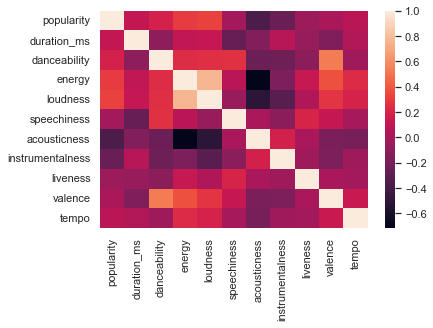

In [ ]:
sns.heatmap(dfnum.corr())

#### Creación del Modelo de Predicción

In [ ]:
dfunion = pd.concat([dfnum,dfcat], axis = 1)
dfunion.drop(columns = ["popularity","key"], inplace = True)
dfunion.head()

In [ ]:
y = dfunion[["list_pop"]]
x = dfunion[[
  'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
  'id', 'explicit', 'id_artists', 'mode', 'Name_Length',
  'words_name', 'release_year', 'release_month', 'release_day',
  'release_trim', 'time_signature', 'list_key'
]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=200, stratify=y_train)

#### Balanceo de Datos

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter 

os_us = SMOTETomek(random_state=2022, sampling_strategy='all')

x_train_num_smote, y_train_num_smote = os_us.fit_resample(x_train, y_train)

#x_train_all_smote, y_train_all_smote = os_us.fit_resample(x_train, y_train)